In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv(r"C:\Users\kjay1\Downloads\Used Car price\train-data.csv")
df

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [3]:
df = df.drop(columns = 'Unnamed: 0', axis = 1)
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [4]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [5]:
df = df.drop(columns = 'New_Price', axis = 1)
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [6]:
df.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [7]:
df = df.dropna(axis=0, how='any')
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [8]:
df = df.reset_index(drop=True)
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
5970,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
5971,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
5972,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
5973,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [9]:
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [10]:
df['Name']

0                 Maruti Wagon R LXI CNG
1       Hyundai Creta 1.6 CRDi SX Option
2                           Honda Jazz V
3                      Maruti Ertiga VDI
4        Audi A4 New 2.0 TDI Multitronic
                      ...               
5970                    Maruti Swift VDI
5971            Hyundai Xcent 1.1 CRDi S
5972               Mahindra Xylo D4 BSIV
5973                  Maruti Wagon R VXI
5974               Chevrolet Beat Diesel
Name: Name, Length: 5975, dtype: object

In [11]:
df['Name'].value_counts()

Mahindra XUV500 W8 2WD            49
Maruti Swift VDI                  45
Honda City 1.5 S MT               34
Maruti Swift Dzire VDI            34
Maruti Swift VDI BSIV             31
                                  ..
BMW X3 xDrive 20d xLine            1
Mahindra Bolero DI BSII            1
Hyundai i20 2015-2017 1.2 Asta     1
Maruti Alto 800 LXI Airbag         1
Maruti Wagon R VXI Minor ABS       1
Name: Name, Length: 1855, dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5975 entries, 0 to 5974
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine             5975 non-null   object 
 9   Power              5975 non-null   object 
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 560.3+ KB


In [14]:
for i in range(len(df["Name"])):
    df.at[i, "Name"] = df["Name"][i].split(' ')[0]

In [15]:
for i in range(len(df["Power"])):
    df.at[i, "Power"]= df["Power"][i].split()[0]

In [16]:
for i in range(len(df["Engine"])):
    df.at[i, "Engine"]= df["Engine"][i].split()[0]

In [17]:
for i in range(len(df["Mileage"])):
    df.at[i, "Mileage"]= df["Mileage"][i].split()[0]

In [18]:
df.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5975 entries, 0 to 5974
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine             5975 non-null   object 
 9   Power              5975 non-null   object 
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 560.3+ KB


In [20]:
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,5975.000000,5.975000e+03,5975.000000,5975.000000
mean,2013.386778,5.867431e+04,5.278828,9.501647
std,3.247238,9.155851e+04,0.808959,11.205736
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2012.000000,3.390800e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.650000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [21]:
nulldrops = df.loc[df['Power'] == 'null'].index

In [22]:
103/5975*100

1.7238493723849373

In [23]:
5975-103

5872

In [24]:
5872/6019*100

97.55773384283104

In [25]:
df.loc[df['Power'] == 'null']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
76,Ford,Jaipur,2008,111111,Diesel,Manual,First,17.8,1399,null,5.0,2.00
79,Hyundai,Hyderabad,2005,87591,Petrol,Manual,First,0.0,1086,null,5.0,1.30
89,Hyundai,Hyderabad,2007,73745,Petrol,Manual,First,17.0,1086,null,5.0,2.10
120,Hyundai,Mumbai,2005,102000,Petrol,Manual,Second,17.0,1086,null,5.0,0.85
143,Hyundai,Kochi,2008,80759,Petrol,Manual,Third,17.0,1086,null,5.0,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...
5818,Hyundai,Chennai,2007,79000,Petrol,Manual,First,17.0,1086,null,5.0,1.85
5830,Hyundai,Pune,2006,47200,Petrol,Manual,Second,17.0,1086,null,5.0,1.20
5881,Skoda,Pune,2010,85000,Petrol,Manual,First,17.5,1798,null,5.0,2.85
5899,Mahindra,Chennai,2002,75000,Diesel,Manual,First,0.0,2112,null,6.0,1.70


In [26]:
df = df.drop(nulldrops).reset_index(drop=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Mileage            5872 non-null   object 
 8   Engine             5872 non-null   object 
 9   Power              5872 non-null   object 
 10  Seats              5872 non-null   float64
 11  Price              5872 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 550.6+ KB


In [28]:
df['Engine'] = df['Engine'].astype('int64')
df['Power'] = df['Power'].astype('float64')
df['Mileage'] = df['Mileage'].astype('float64')
df['Name'] = df['Name'].astype('category')
df['Location'] = df['Location'].astype('category')
df['Fuel_Type'] = df['Fuel_Type'].astype('category')
df['Transmission'] = df['Transmission'].astype('category')
df['Owner_Type'] = df['Owner_Type'].astype('category')

In [29]:
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5872.000000,5.872000e+03,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000
mean,2013.477691,5.831700e+04,18.277839,1625.745572,113.276894,5.283719,9.603919
std,3.164568,9.216941e+04,4.365657,601.641783,53.881892,0.805081,11.249453
min,1998.000000,1.710000e+02,0.000000,624.000000,34.200000,2.000000,0.440000
25%,2012.000000,3.342250e+04,15.260000,1198.000000,75.000000,5.000000,3.517500
50%,2014.000000,5.260900e+04,18.200000,1495.500000,97.700000,5.000000,5.750000
75%,2016.000000,7.240275e+04,21.100000,1991.000000,138.100000,5.000000,10.000000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


In [30]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
5867,Maruti,Delhi,2014,27365,Diesel,Manual,First,28.40,1248,74.00,5.0,4.75
5868,Hyundai,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120,71.00,5.0,4.00
5869,Mahindra,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498,112.00,8.0,2.90
5870,Maruti,Kolkata,2013,46000,Petrol,Manual,First,18.90,998,67.10,5.0,2.65


In [31]:
X = df.drop(columns= ['Price', 'Name'], axis = 1)
y = df['Price']

In [32]:
X

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0
...,...,...,...,...,...,...,...,...,...,...
5867,Delhi,2014,27365,Diesel,Manual,First,28.40,1248,74.00,5.0
5868,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120,71.00,5.0
5869,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498,112.00,8.0
5870,Kolkata,2013,46000,Petrol,Manual,First,18.90,998,67.10,5.0


In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [96]:
len(X_train), len(X_test), len(y_train), len(y_test)

(4697, 1175, 4697, 1175)

In [157]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4697 entries, 5010 to 1146
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           4697 non-null   category
 1   Year               4697 non-null   int64   
 2   Kilometers_Driven  4697 non-null   int64   
 3   Fuel_Type          4697 non-null   category
 4   Transmission       4697 non-null   category
 5   Owner_Type         4697 non-null   category
 6   Mileage            4697 non-null   float64 
 7   Engine             4697 non-null   int64   
 8   Power              4697 non-null   float64 
 9   Seats              4697 non-null   float64 
dtypes: category(4), float64(3), int64(3)
memory usage: 276.1 KB


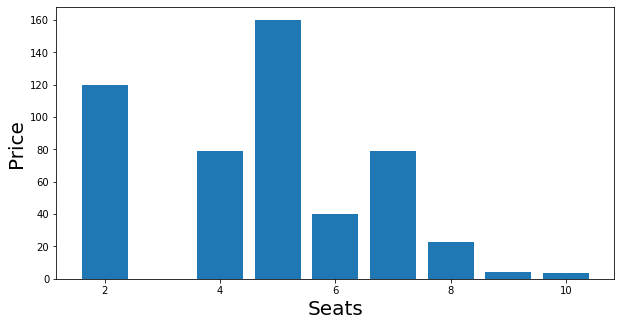

In [60]:
fig, ax = plt.subplots(figsize=(10,5))
plt.xlabel('Seats',size = 20)
plt.ylabel('Price',size = 20)
plt.bar(X_train['Seats'],y_train);

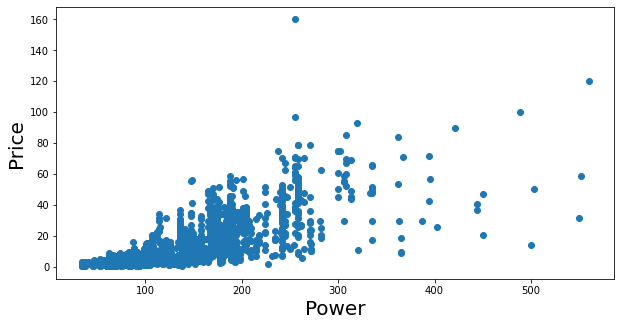

In [61]:
fig, ax = plt.subplots(figsize=(10,5))
plt.xlabel('Power',size = 20)
plt.ylabel('Price',size = 20)
plt.scatter(X_train['Power'],y_train);

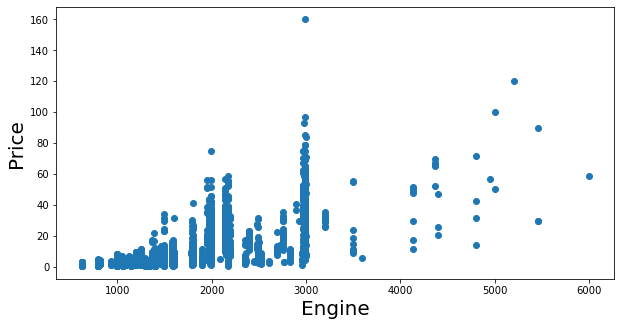

In [62]:
fig, ax = plt.subplots(figsize=(10,5))
plt.xlabel('Engine',size = 20)
plt.ylabel('Price',size = 20)
plt.scatter(X_train['Engine'],y_train);

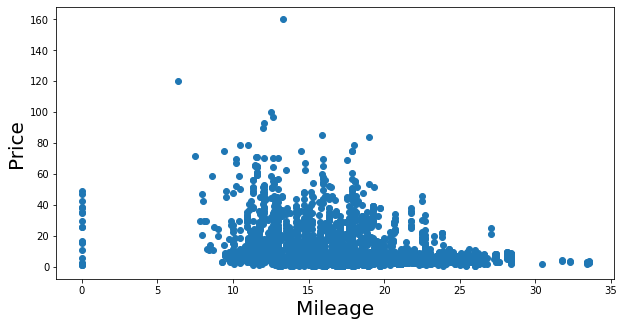

In [63]:
fig, ax = plt.subplots(figsize=(10,5))
plt.xlabel('Mileage',size = 20)
plt.ylabel('Price',size = 20)
plt.scatter(X_train['Mileage'],y_train);

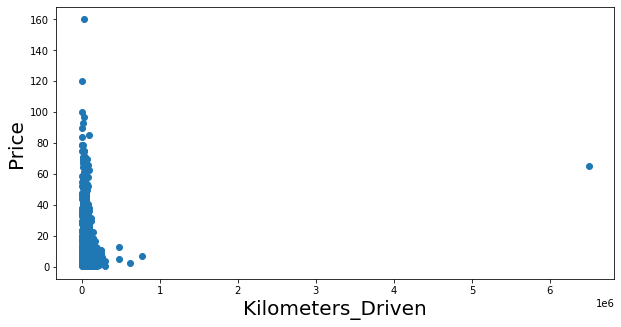

In [64]:
fig, ax = plt.subplots(figsize=(10,5))
plt.xlabel('Kilometers_Driven',size = 20)
plt.ylabel('Price',size = 20)
plt.scatter(X_train['Kilometers_Driven'],y_train);

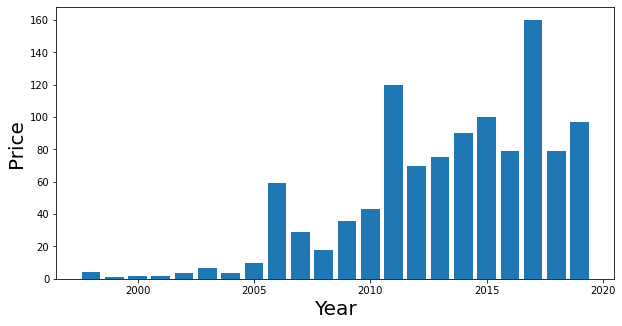

In [65]:
fig, ax = plt.subplots(figsize=(10,5))
plt.xlabel('Year',size = 20)
plt.ylabel('Price',size = 20)
plt.bar(X_train['Year'],y_train);

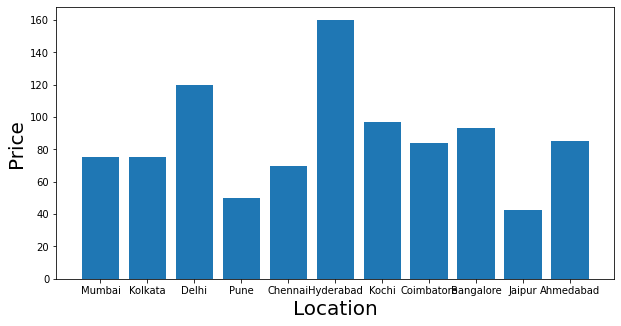

In [66]:
fig, ax = plt.subplots(figsize=(10,5))
plt.xlabel('Location',size = 20)
plt.ylabel('Price',size = 20)
plt.bar(X_train['Location'],y_train);

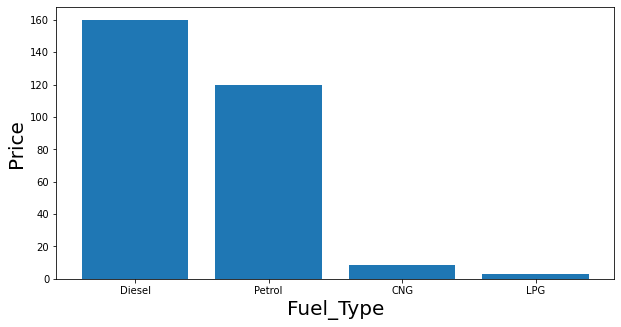

In [67]:
fig, ax = plt.subplots(figsize=(10,5))
plt.xlabel('Fuel_Type',size = 20)
plt.ylabel('Price',size = 20)
plt.bar(X_train['Fuel_Type'],y_train);

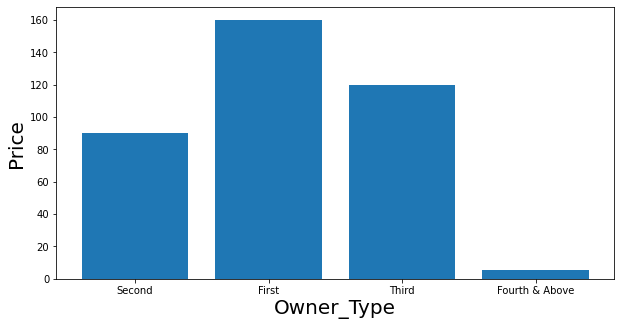

In [68]:
fig, ax = plt.subplots(figsize=(10,5))
plt.xlabel('Owner_Type',size = 20)
plt.ylabel('Price',size = 20)
plt.bar(X_train['Owner_Type'],y_train);

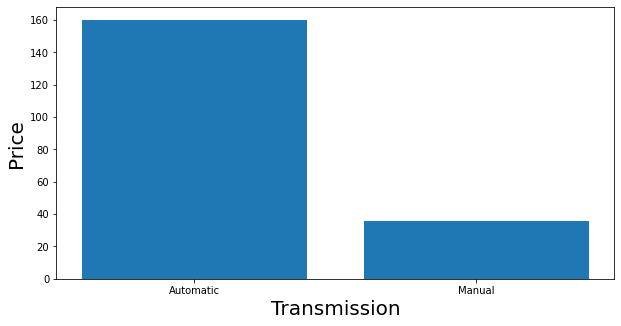

In [69]:
fig, ax = plt.subplots(figsize=(10,5))
plt.xlabel('Transmission',size = 20)
plt.ylabel('Price',size = 20)
plt.bar(X_train['Transmission'],y_train);

In [98]:
X_train.corrwith(y_train)

Year                 0.286342
Kilometers_Driven   -0.149239
Mileage             -0.333939
Engine               0.652421
Power                0.768293
Seats                0.055702
dtype: float64

In [99]:
X_train.shape

(4697, 10)

In [100]:
hot_enc = OneHotEncoder(sparse=False)

In [101]:
scale = StandardScaler()

In [102]:
Preprocessor = ColumnTransformer(remainder='passthrough',
                                 transformers=[
                                            ("ohe", hot_enc, ['Location', 'Fuel_Type','Transmission','Owner_Type']),
                                            ("sc", scale, ['Year', 'Kilometers_Driven','Mileage','Engine', 'Power', 'Seats'])
                                 ])

In [103]:
Preprocessor.fit_transform(X_train)

array([[ 0.        ,  0.        ,  0.        , ...,  0.87443571,
         1.70373026, -0.35229342],
       [ 0.        ,  0.        ,  0.        , ..., -1.04251238,
        -0.85992041, -0.35229342],
       [ 0.        ,  0.        ,  0.        , ..., -0.62396476,
        -0.67505082, -0.35229342],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -1.35056343,
        -1.0844049 , -0.35229342],
       [ 0.        ,  0.        ,  0.        , ..., -1.14631219,
        -1.03913072, -0.35229342],
       [ 0.        ,  0.        ,  0.        , ..., -0.70934848,
        -0.5820501 , -0.35229342]])

In [117]:
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor

In [183]:
RF_regressor = RandomForestRegressor()

In [126]:
ET_regressor = ExtraTreesRegressor()

In [127]:
Bag_regressor = BaggingRegressor()

In [128]:
AdaB_regressor = AdaBoostRegressor()

In [145]:
GB_regressor = GradientBoostingRegressor()

In [151]:
pipe = Pipeline(steps = [
                            ('Preprocessor', Preprocessor),
                            ('Regressor', GB_regressor)
                        ]
               )

In [152]:
pipe

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(sparse=False),
                                                  ['Location', 'Fuel_Type',
                                                   'Transmission',
                                                   'Owner_Type']),
                                                 ('sc', StandardScaler(),
                                                  ['Year', 'Kilometers_Driven',
                                                   'Mileage', 'Engine', 'Power',
                                                   'Seats'])])),
                ('Regressor', GradientBoostingRegressor())])

In [153]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(sparse=False),
                                                  ['Location', 'Fuel_Type',
                                                   'Transmission',
                                                   'Owner_Type']),
                                                 ('sc', StandardScaler(),
                                                  ['Year', 'Kilometers_Driven',
                                                   'Mileage', 'Engine', 'Power',
                                                   'Seats'])])),
                ('Regressor', GradientBoostingRegressor())])

In [181]:
y_pred = pipe.predict(df2)
y_pred

array([8.87372743])

In [161]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [164]:
sc = r2_score(y_test, y_pred)
sc

0.9030315428809508

In [154]:
score = cross_val_score(pipe, X_train, y_train, cv=5, scoring='r2', verbose=3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.838) total time=   0.7s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] END ................................ score: (test=0.890) total time=   0.8s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


[CV] END ................................ score: (test=0.796) total time=   0.9s
[CV] END ................................ score: (test=0.870) total time=   0.8s
[CV] END ................................ score: (test=0.885) total time=   0.7s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.4s finished


In [155]:
Score = np.mean(score)
Score

0.8557377168707244

In [176]:
Location = 'Pune'
Year = 2015
Kilometers_Driven = 41000
Fuel_Type = 'Diesel'
Transmission = 'Manual'
Owner_Type = 'First'
Mileage = 19.67
Engine = 1582
Power = 126.2
Seats = 5.0

In [177]:
my_list = [Location, Year, Kilometers_Driven, Fuel_Type,
       Transmission, Owner_Type, Mileage, Engine, Power, Seats]

In [178]:
my_list

['Pune', 2015, 41000, 'Diesel', 'Manual', 'First', 19.67, 1582, 126.2, 5.0]

In [179]:
df2 = pd.DataFrame(np.array([my_list]),
                   columns=['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
                            'Transmission', 'Owner_Type', 'Mileage', 'Engine',
                            'Power', 'Seats'])
df2

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0


In [180]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Location           1 non-null      object
 1   Year               1 non-null      object
 2   Kilometers_Driven  1 non-null      object
 3   Fuel_Type          1 non-null      object
 4   Transmission       1 non-null      object
 5   Owner_Type         1 non-null      object
 6   Mileage            1 non-null      object
 7   Engine             1 non-null      object
 8   Power              1 non-null      object
 9   Seats              1 non-null      object
dtypes: object(10)
memory usage: 208.0+ bytes


In [ ]:
Pune	2015	41000	Diesel	Manual	First	19.67	1582	126.2	5.0	